# Projeto Final - IA
### Kelvin Brenand - 20180005270

### Motivação: Promover a disseminação da música erudita no Brasil

### Objetivo: Dado um conjunto de características de uma música, recomendar o compositor que apresenta as características mais similares.

#### O modelo aprende essas características e faz recomendações com base nesse aprendizado.

# Imports and Utils

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import sklearn.metrics
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Base de dados original: https://www.kaggle.com/datasets/vicsuperman/prediction-of-music-genre

df = pd.read_csv("https://drive.google.com/uc?export=download&id=1hJ1WiE-o8cvBIEb57uInjKNDvvquRZXk")
dfClassic = pd.read_csv("https://drive.google.com/uc?export=download&id=1O9NpXOr-GRn8SWnY-1aFIUE7WIyjTSHu")

In [ ]:
def Label_enc(param):
    LabelE = LabelEncoder()
    LabelE.fit(param)
    return LabelE.transform(param)

# Data Preprocessing and Exploratory Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50005 entries, 0 to 50004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  float64
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50000 non-null  float64
 4   acousticness      50000 non-null  float64
 5   danceability      50000 non-null  float64
 6   duration_ms       50000 non-null  float64
 7   energy            50000 non-null  float64
 8   instrumentalness  50000 non-null  float64
 9   key               50000 non-null  object 
 10  liveness          50000 non-null  float64
 11  loudness          50000 non-null  float64
 12  mode              50000 non-null  object 
 13  speechiness       50000 non-null  float64
 14  tempo             50000 non-null  object 
 15  obtained_date     50000 non-null  object 
 16  valence           50000 non-null  float6

In [ ]:
df.head(5)

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [ ]:
dfClassic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2660 entries, 0 to 2659
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2660 non-null   int64  
 1   artist_name       2660 non-null   object 
 2   acousticness      2660 non-null   float64
 3   danceability      2660 non-null   float64
 4   instrumentalness  2660 non-null   float64
 5   key               2660 non-null   int64  
 6   liveness          2660 non-null   float64
 7   mode              2660 non-null   float64
 8   speechiness       2660 non-null   float64
 9   tempo             2660 non-null   float64
 10  valence           2660 non-null   float64
 11  music_genre       2660 non-null   object 
dtypes: float64(8), int64(2), object(2)
memory usage: 249.5+ KB


In [ ]:
dfClassic.head(5)

,Unnamed: 0,artist_name,acousticness,danceability,instrumentalness,key,liveness,mode,speechiness,tempo,valence,music_genre
0,40005,Ludwig van Beethoven,0.861,0.250,0.035600,7,0.2490,0.0,0.0385,123.736,0.0397,Classical
1,40007,Wolfgang Amadeus Mozart,0.991,0.183,0.000059,1,0.4590,1.0,0.0521,71.221,0.1180,Classical
2,40009,Franz Schubert,0.985,0.367,0.003950,2,0.0821,1.0,0.0557,176.348,0.5650,Classical
3,40010,Arcangelo Corelli,0.890,0.455,0.229000,6,0.0766,1.0,0.0408,117.309,0.5690,Classical
4,40011,Johannes Brahms,0.995,0.369,0.887000,11,0.0746,1.0,0.0562,69.690,0.1240,Classical


In [ ]:
#Número de compositores
dfClassic['artist_name'].nunique()

78

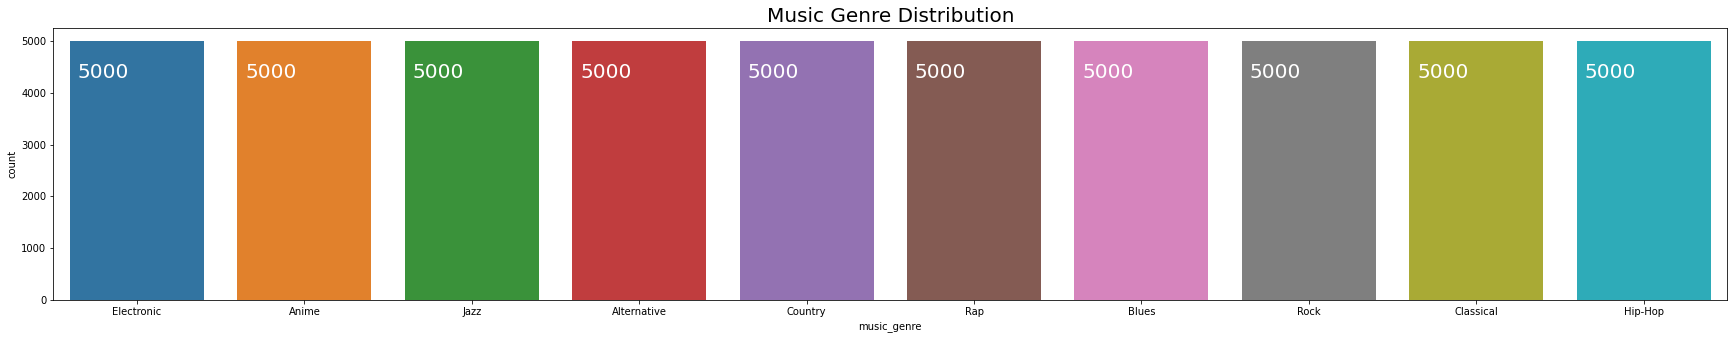

In [ ]:
plt.figure(figsize=(30,5))
ax = sns.countplot(x="music_genre", data=df)
ax.set_title('Music Genre Distribution', fontsize=20)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=20)
plt.show()

In [ ]:
#Remove colunas que não são pertinentes
#Realiza um mapeamento da features 'mode' e 'key'
#Remove dados faltosos e converte a feature 'tempo' para float 
#df = df.drop(['artist_name','instance_id','track_name','popularity','duration_ms','obtained_date'], axis=1)
df = df.drop(['instance_id','popularity','duration_ms','obtained_date'], axis=1)
df["mode"] = df["mode"].map({"Minor": 0, "Major": 1})
df["key"] = Label_enc(df["key"])
df = df.drop(df[df["tempo"] == "?"].index)
df = df.drop(df[df["artist_name"] == "empty_field"].index)
df["tempo"] = df["tempo"].astype("float")
df = df.dropna()

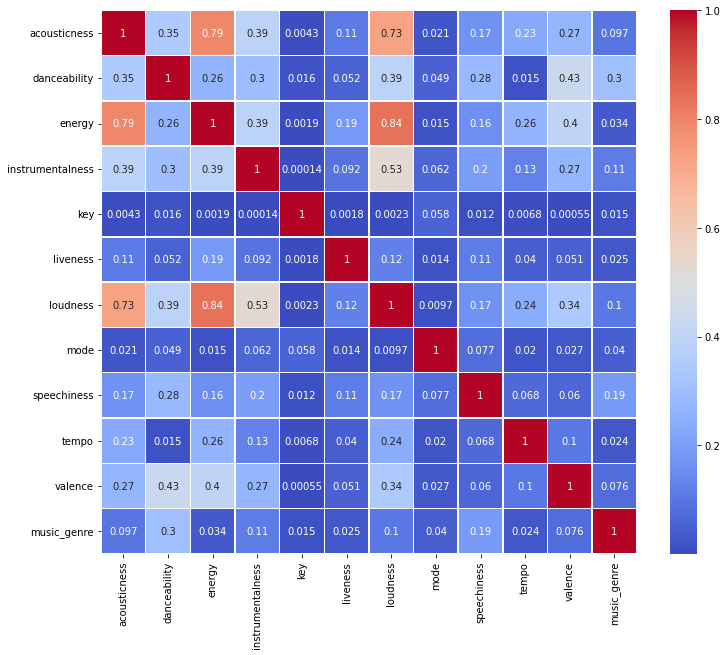

In [ ]:
#Matriz de correlação
df_bis = df.copy()
plt.figure(figsize=(12,10))
df_bis["music_genre"] = Label_enc(df_bis["music_genre"])
tabcorr = df_bis.corr()
sns.heatmap(abs(tabcorr), annot=True, linewidths=.5,  cmap="coolwarm")

In [ ]:
#Remove duas das três features com alta correlação
df = df.drop(['energy','loudness'], axis=1)
df = df[df.music_genre != 'Classical']
df = df.drop(['music_genre'], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38534 entries, 0 to 50004
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist_name       38534 non-null  object 
 1   track_name        38534 non-null  object 
 2   acousticness      38534 non-null  float64
 3   danceability      38534 non-null  float64
 4   instrumentalness  38534 non-null  float64
 5   key               38534 non-null  int64  
 6   liveness          38534 non-null  float64
 7   mode              38534 non-null  float64
 8   speechiness       38534 non-null  float64
 9   tempo             38534 non-null  float64
 10  valence           38534 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 3.5+ MB


In [ ]:
#Remove colunas que não são pertinentes
dfClassic = dfClassic.drop(['music_genre','Unnamed: 0'], axis=1)

In [ ]:
#Aquisição das caracteristicas dos compositores
dfClassic = dfClassic.groupby(['artist_name'],as_index=False).mean()
df2 = dfClassic.copy()
df2 = df2.drop(['artist_name'], axis=1)

In [ ]:
#Reudução de dimensionalidade
pca = PCA(n_components=1)
pcaResult = pca.fit_transform(df2)
pcaResult2 = pca.fit_transform(df.iloc[:,2:])

In [ ]:
#Relação das músicas do df com o compositor correspondente
y = []
for i in range(len(pcaResult2)):
  smallest = abs(pcaResult2[i]-pcaResult[0])
  smIndex = 0
  for j in range(1, len(pcaResult)):
    aux = abs(pcaResult2[i]-pcaResult[j])
    if aux < smallest:
      smallest = aux
      smIndex = j
  y.append(dfClassic.iloc[smIndex]['artist_name'])

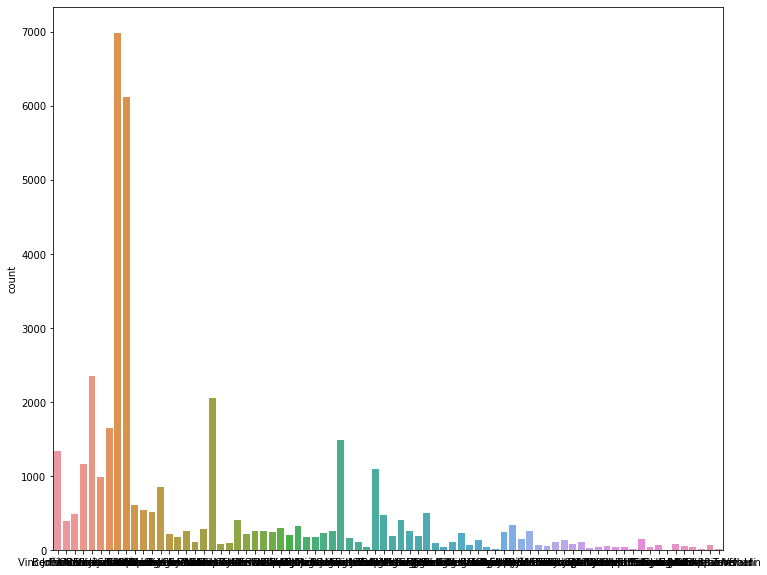

In [ ]:
plt.figure(figsize=(12,10))
sns.countplot(y,label="Count")
plt.show()

In [ ]:
#Quantidade limite de elementos que as classes podem ter
#Variável utilizada no undersample
und = 100

In [ ]:
#Obtém o dicionário que será passado como parametro para a função
#RandomUnderSampler(), por se tratar de uma multi-class classification
yy = y.copy()
myset = set(yy)
dict = {}
for elem in yy:
  if y.count(elem) > und:
    dict.update({elem:und})

In [ ]:
#Performa o undersample para balancear as classes
undersample = RandomUnderSampler(sampling_strategy=dict)
X, y = undersample.fit_resample(df, y)

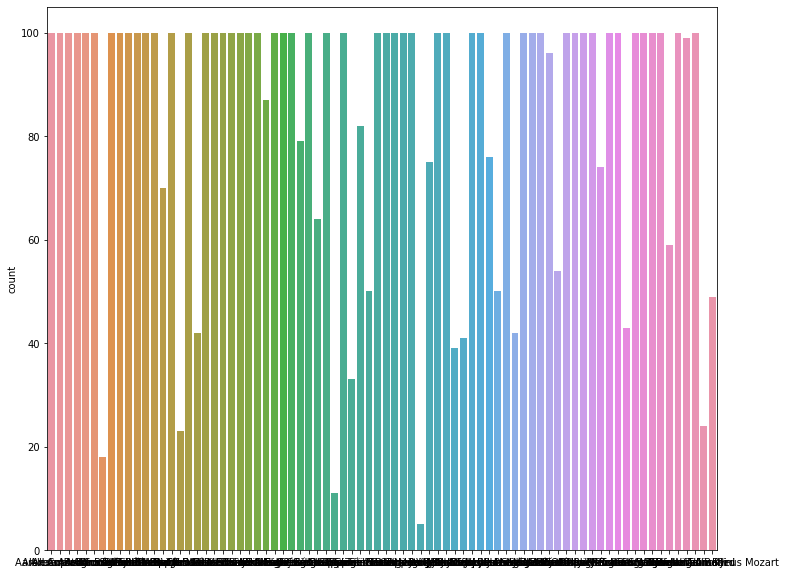

In [ ]:
plt.figure(figsize=(12,10))
sns.countplot(y,label="Count")
plt.show()

In [ ]:
#Performa o oversample para balancear as classes
oversample = RandomOverSampler(sampling_strategy='all')
X, y = oversample.fit_resample(X, y)

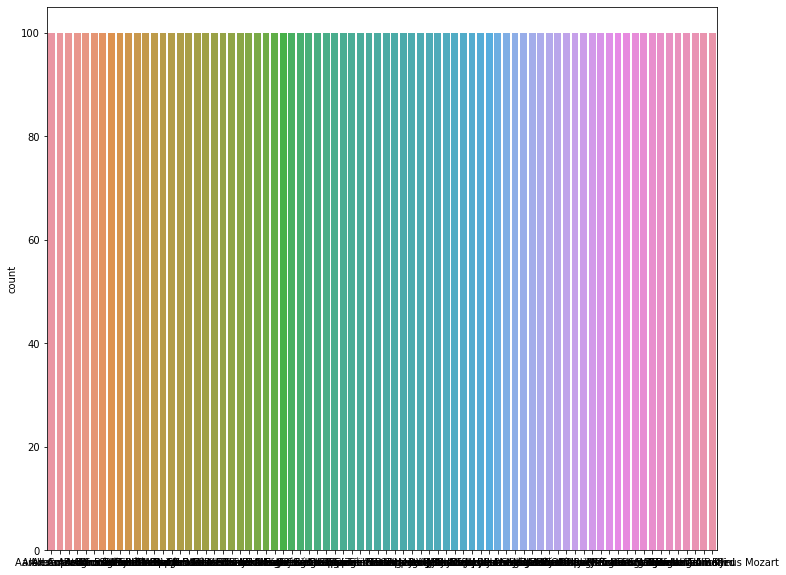

In [ ]:
plt.figure(figsize=(12,10))
sns.countplot(y,label="Count")
plt.show()

# Model Training

In [ ]:
#Normalização
sc = StandardScaler()
X.iloc[:,2:] = sc.fit_transform(X.iloc[:,2:])

In [ ]:
#Divisão dos conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 123)

In [ ]:
#Treinamento
clf = RandomForestClassifier(n_estimators = 100,max_depth=10,oob_score=True, max_features="sqrt").fit(X_train.iloc[:,2:], y_train)

# Results

In [ ]:
print(sklearn.metrics.confusion_matrix(y_test, clf.predict(X_test.iloc[:,2:])))

[[ 4  0  0 ...  0  0  0]
 [ 0  5  0 ...  0  1  0]
 [ 0  0  8 ...  0  0  0]
 ...
 [ 0  0  0 ... 10  0  0]
 [ 0  0  0 ...  0 11  0]
 [ 0  0  0 ...  0  0 15]]


In [ ]:
print(sklearn.metrics.classification_report(y_test, clf.predict(X_test.iloc[:,2:])))

                                  precision    recall  f1-score   support

                   Aaron Copland       0.67      0.80      0.73         5
                      Alban Berg       1.00      0.71      0.83         7
               Alexander Borodin       0.89      0.89      0.89         9
              Alexander Scriabin       1.00      0.58      0.74        12
                  Anton Bruckner       1.00      0.90      0.95        10
                 Antonio Salieri       1.00      1.00      1.00        11
                 Antonio Vivaldi       0.85      1.00      0.92        11
                  Antonín Dvořák       0.80      0.89      0.84         9
               Arcangelo Corelli       1.00      0.91      0.95        11
               Arnold Schoenberg       1.00      1.00      1.00         6
                 Bedřich Smetana       0.91      0.91      0.91        11
                Benjamin Britten       1.00      0.67      0.80        15
                     Béla Bartók     

# Predict

In [ ]:
#Exibe as informações de uma music track
track = 38
print(X_test.iloc[track])

artist_name         System Of A Down
track_name                  Toxicity
acousticness               -0.881968
danceability               -1.283035
instrumentalness           -0.498888
key                         1.610265
liveness                    0.028128
mode                        0.748957
speechiness                -0.302174
tempo                      -0.388729
valence                    -0.073746
Name: 5030, dtype: object


In [ ]:
#Prediz um compositor para a music track selecionada
print(clf.predict(np.array(X_test.iloc[track,2:]).reshape(1, -1)))

['Maurice Ravel']


# Trabalhos futuros:

## 1.   Mudar a metodologia de aquisição das características dos compositores:

  ### 1.1   Substituir a média por outra forma de cálculo mais sofisticada;

  ### 1.2   Substituir o PCA por Autoencoder;

## 2.   Criação de um método que receba um arquivo .mp3 de uma música qualquer e retorne as características da música.

